<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/LR_vs_LSTM_on_PIMA_without_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview #

Two diabetic datasets can be explored:

1. UCI

2. PIMA: "This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes."

Adopted from:

- [Collab notebook](https://github.com/1UC1F3R616/myGoogleCollabNotebooks/blob/master/Pima_Indians_Diabetes.ipynb)

- [MDPI 2019](https://www.mdpi.com/2076-3417/9/17/3532/pdf)






# A) Mount and download datasets #

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Download UCI-Diabetes ##

In [0]:
import os
if os.path.isdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/' )==False:
  try:
    ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/'
  except e as Exception:
    pass  

if os.path.isdir( '/content/drive/My Drive/Colab Notebooks/opensource_datasets/UCI-diabetes' )==False:
  try:
    ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/UCI-diabetes'
  except e as Exception:
    pass  
    
os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/UCI-diabetes')

In [0]:
! wget -O diabetes2.Z https://archive.ics.uci.edu/ml/machine-learning-databases/diabetes/diabetes-data.tar.Z
! tar xvf diabetes2.Z

## Download PIMA ##

In [0]:
import os
if os.path.isdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/' )==False:
  try:
    ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/'
  except e as Exception:
    pass  

if os.path.isdir( '/content/drive/My Drive/Colab Notebooks/opensource_datasets/PIMA' )==False:
  try:
    ! mkdir '/content/drive/My Drive/Colab Notebooks/opensource_datasets/PIMA'
  except e as Exception:
    pass  
    
os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/PIMA')

In [5]:
! git clone https://github.com/lisatwyw/GlucoseLevels.git
! ls

Cloning into 'GlucoseLevels'...
remote: Enumerating objects: 42, done.
remote: Total 42 (delta 0), reused 0 (delta 0), pack-reused 42
Unpacking objects: 100% (42/42), done.
GlucoseLevels


In [6]:
os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/PIMA/GlucoseLevels')
! ls

ann_BGL.ipynb  diabetes3.csv  diabetes.csv  README.md
diabetes2.csv  diabetes4.csv  glucose_RF.R


# B) Load data  #

In [7]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
feature_cols=['pregnant','insulin', 'bmi', 'age','glucose','bp','pedigree']

pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
print(pima.shape)
pima.drop(pima.index[0], inplace=True)
print(pima.shape)
pima.head()

(769, 9)
(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


# C) Setup machine learning experiments #

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

seed = 42
np.random.seed(seed)

import keras
keras.__version__

'2.3.1'

In [12]:
X = pima[feature_cols] # Features
y = pima.label # Target variable

X=X.to_numpy('float')
y=y.to_numpy('int')

X.shape

(768, 7)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

X_train0=X_train.copy()
X_test0=X_test.copy()

In [0]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

## Try classical methods, like logistic regression ##

[[228  25]
 [ 56  75]]
Accuracy: 0.7890625
Precision: 0.75
Recall: 0.5725190839694656
AUC: 0.849


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


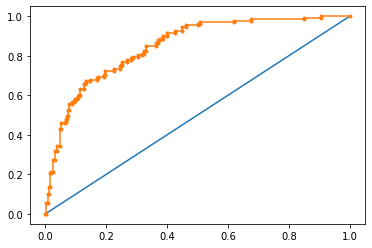

In [14]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(verbose=False ) 

# fit the model with data
logreg.fit(X_train0,y_train)

# Predict the response for test dataset 
y_pred=logreg.predict(X_test0)
yp = logreg.predict_proba(X_test0)[:,1]

# import the metrics class
from sklearn import metrics
cmat = metrics.confusion_matrix(y_test, y_pred)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=1))

auc = roc_auc_score(y_test, yp)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, yp)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()


## Standardize input variables using training set only ##

In [15]:
# raw data
X_trn0 = np.expand_dims(X_train0,2)
X_tst0 = np.expand_dims(X_test0,2)

# after standardizing
scaler = preprocessing.StandardScaler().fit(X_train0)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_trn = np.expand_dims(X_train,2)
X_tst = np.expand_dims(X_test,2)

print( scaler.n_samples_seen_,scaler.mean_, scaler.var_ )

384 [  3.77083333  88.0390625   32.14453125  33.390625   121.73958333
  70.5546875    0.46521875] [1.14162326e+01 1.51816834e+04 6.53255951e+01 1.43758870e+02
 1.02317177e+03 3.45611593e+02 1.17655426e-01]


In [16]:
transformer = preprocessing.Normalizer().fit(X_train0) 
X_train2 = transformer.transform(X_train0)
X_test2 = transformer.transform(X_test0)
X_trn2 = np.expand_dims(X_train2,2)
X_tst2 = np.expand_dims(X_test2,2)

transformer = preprocessing.RobustScaler().fit(X_train0) 
X_train3 = transformer.transform(X_train0)
X_test3 = transformer.transform(X_test0)
X_trn3 = np.expand_dims(X_train3,2)
X_tst3 = np.expand_dims(X_test3,2)



df=pd.DataFrame( {'Raw':np.max(X_test0,0), '1':np.max(X_test,0), '2':np.max(X_test2,0), '3':np.max(X_test3,0) } ) 
print( df)

df=pd.DataFrame( {'Raw':np.min(X_test0,0), '1':np.min(X_test,0), '2':np.min(X_test2,0),'3':np.min(X_test3,0) } ) 
print( df)



       Raw         1         2         3
0   17.000  3.915354  0.117208  2.800000
1  680.000  4.804333  0.960715  4.505338
2   57.300  3.112366  0.423657  2.706522
3   72.000  3.220145  0.512539  2.687500
4  199.000  2.415365  0.973682  1.940828
5  114.000  2.336947  0.868295  2.625000
6    1.893  4.162514  0.013588  4.310078
      Raw         1         2         3
0   0.000 -1.116030  0.000000 -0.600000
1   0.000 -0.714522  0.000000 -0.334520
2   0.000 -3.977090  0.000000 -3.521739
3  21.000 -1.033418  0.032495 -0.500000
4   0.000 -3.805901  0.000000 -2.769231
5   0.000 -3.795174  0.000000 -4.500000
6   0.078 -1.128887  0.000250 -0.806202


## Try logistic regression with the standardized input data ##


Results using Standard normalizer:
[[229  24]
 [ 56  75]]
Accuracy: 0.7916666666666666
Precision: 0.7575757575757576
Recall: 0.5725190839694656

Results using data Normalizer:
[[245   8]
 [119  12]]
Accuracy: 0.6692708333333334
Precision: 0.6
Recall: 0.0916030534351145

Results using robust normalization:
[[229  24]
 [ 56  75]]
Accuracy: 0.7916666666666666
Precision: 0.7575757575757576
Recall: 0.5725190839694656
[[229  24]
 [ 56  75]]
Accuracy: 0.7916666666666666
Precision: 0.7575757575757576
Recall: 0.5725190839694656
AUC: 0.850


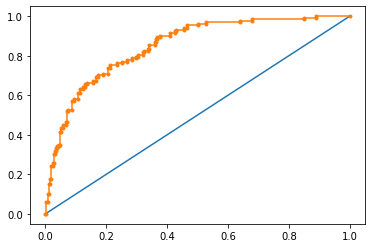

In [17]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression() 

# fit the model with data
logreg.fit(X_train,y_train)

# Predict the response for test dataset 
y_pred=logreg.predict(X_test)


# import the metrics class
from sklearn import metrics
cmat = metrics.confusion_matrix(y_test, y_pred)

print('\nResults using Standard normalizer:')
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=1))


# instantiate the model (using the default parameters)
logreg = LogisticRegression() 

# fit the model with data
logreg.fit(X_train2,y_train)

# Predict the response for test dataset 
y_pred=logreg.predict(X_test2)

# import the metrics class
from sklearn import metrics
cmat = metrics.confusion_matrix(y_test, y_pred)
print('\nResults using data Normalizer:')
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=1))



# instantiate the model (using the default parameters)
logreg = LogisticRegression() 

# fit the model with data
logreg.fit(X_train3,y_train)

# Predict the response for test dataset 
y_pred=logreg.predict(X_test3)

cmat = metrics.confusion_matrix(y_test, y_pred)
print('\nResults using robust normalization:')
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=1))



yp = logreg.predict_proba(X_test3)[:,1]
cmat = metrics.confusion_matrix(y_test, y_pred)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=1))

auc = roc_auc_score(y_test, yp)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, yp)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()


## Train LSTM with raw input data ## 

In [0]:
from keras.callbacks import ModelCheckpoint
C = [ModelCheckpoint(filepath='best.h5',monitor='val_accuracy',save_best_only=True)]

In [21]:
model = Sequential()
model.add(LSTM(32, input_shape = (7,1), return_sequences = True, kernel_initializer = 'uniform', activation ='relu'))
model.add(LSTM(64, kernel_initializer = 'uniform', return_sequences = True, activation = 'relu'))
model.add(LSTM(128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

from keras import optimizers 
        
lr=0.002 
b1=0.9; b2=0.999; ep=1e-08; dd=0.004
opt = optimizers.Nadam()#(lr=lr, beta_1=b1, beta_2=b2, epsilon=ep, schedule_decay=dd)      

model.compile(loss = 'binary_crossentropy', optimizer ='NADAM',  metrics = ['accuracy'])
model.summary()
history = model.fit(X_trn0, y_train, validation_split = 0.33, epochs = 500, batch_size = 64, verbose =1,callbacks=C)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 32)             4352      
_________________________________________________________________
lstm_5 (LSTM)                (None, 7, 64)             24832     
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 16)               

## Examine convergence ##

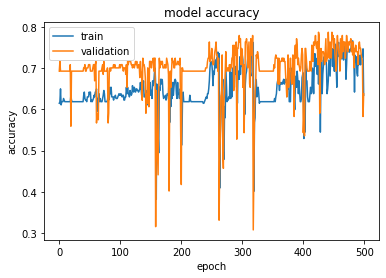

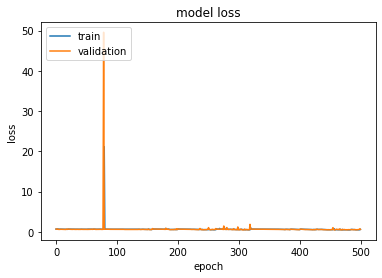

In [22]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper left')
plt.show()

## Evaluate the derived model (obtained from final epoch) ##

AUC: 0.816


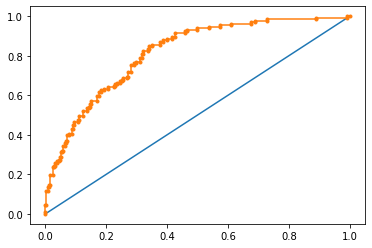

In [23]:
y_pred2=model.predict(X_tst0)
y_pred2=(y_pred2>.5).astype(int)

# todo: use boot-strap estimation
probs = model.predict_proba(X_tst0)
probs = probs[:,0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

In [29]:
cmat = metrics.confusion_matrix(y_test, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred2, pos_label=1))

! ls


[[201  52]
 [ 43  88]]
Accuracy: 0.7526041666666666
Precision: 0.6285714285714286
Recall: 0.6717557251908397
ann_BGL.ipynb  diabetes2.csv  diabetes4.csv  glucose_RF.R
best.h5        diabetes3.csv  diabetes.csv   README.md


## Evaluate using the best model  ##

ann_BGL.ipynb  diabetes2.csv  diabetes4.csv  glucose_RF.R
best.h5        diabetes3.csv  diabetes.csv   README.md
AUC: 0.825


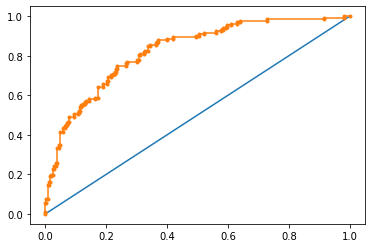

In [27]:
! ls
model.load_weights('best.h5')

y_pred2=model.predict(X_tst0)
y_pred2=(y_pred2>.5).astype(int)

# todo: use boot-strap estimation
probs = model.predict_proba(X_tst0)
probs = probs[:,0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()


In [28]:
cmat = metrics.confusion_matrix(y_test, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred2, pos_label=1))


[[201  52]
 [ 43  88]]
Accuracy: 0.7526041666666666
Precision: 0.6285714285714286
Recall: 0.6717557251908397


## Train LSTM with standardized input data ##

In [0]:
model = Sequential()
model.add(LSTM(32, input_shape = (7,1), return_sequences = True, kernel_initializer = 'uniform', activation ='relu'))
model.add(LSTM(64, kernel_initializer = 'uniform', return_sequences = True, activation = 'relu'))
model.add(LSTM(128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

from keras import optimizers 
        
lr=0.002 
b1=0.9; b2=0.999; ep=1e-08; dd=0.004
opt = optimizers.Nadam()#lr=lr, beta_1=b1, beta_2=b2, epsilon=ep, schedule_decay=dd)      
model.compile(loss = 'binary_crossentropy', optimizer = opt,  metrics = ['accuracy'])
model.summary()
history = model.fit(X_trn, y_train, validation_split = 0.3, epochs = 500, batch_size = 64, verbose = 1,callbacks=C)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 7, 32)             4352      
_________________________________________________________________
lstm_35 (LSTM)               (None, 7, 64)             24832     
_________________________________________________________________
lstm_36 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_56 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 16)              

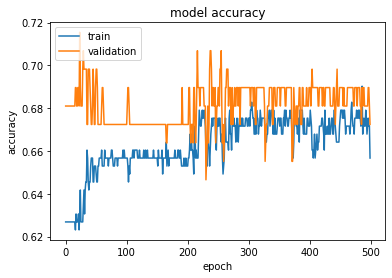

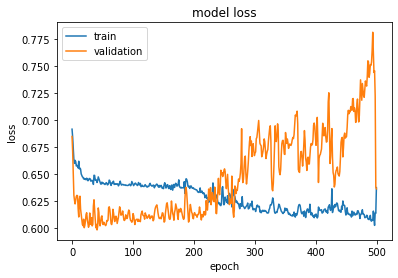

In [0]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper left')
plt.show()


## Evaluate the derived model ##

accuracy.png  best.h5  Diabetes-Data
AUC: 0.501


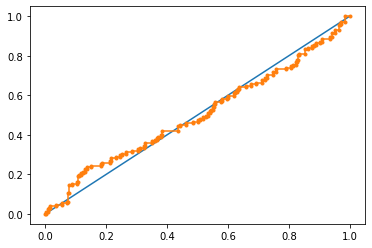

[[233  20]
 [114  17]]
Accuracy: 0.6510416666666666
Precision: 0.4594594594594595
Recall: 0.1297709923664122


In [0]:
! ls
y_pred2=model.predict(X_tst)
y_pred2=(y_pred2>.5).astype(int)

# todo: use boot-strap estimation
probs = model.predict_proba(X_tst)
probs = probs[:,0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()


cmat = metrics.confusion_matrix(y_test, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred2, pos_label=1))

## Evaluate the best model ##

accuracy.png  best.h5  Diabetes-Data
AUC: 0.500


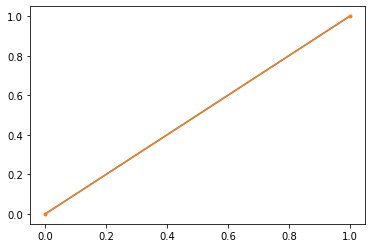

[[253   0]
 [131   0]]
Accuracy: 0.6588541666666666
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
! ls
model.load_weights('best.h5')

y_pred2=model.predict(X_tst)
y_pred2=(y_pred2>.5).astype(int)

# todo: use boot-strap estimation
probs = model.predict_proba(X_tst)
probs = probs[:,0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()


cmat = metrics.confusion_matrix(y_test, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred2, pos_label=1))

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'ADAM',  metrics = ['accuracy'])
model.summary()
history = model.fit(X_trn2, y_train, validation_split = 0.3, epochs = 500, batch_size = 64, verbose = 1,callbacks=C)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 7, 32)             4352      
_________________________________________________________________
lstm_29 (LSTM)               (None, 7, 64)             24832     
_________________________________________________________________
lstm_30 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_48 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_49 (Dense)             (None, 16)              

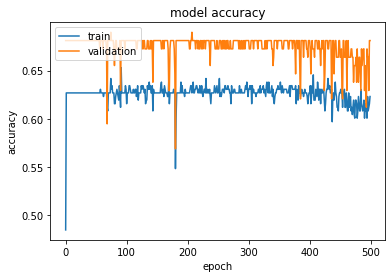

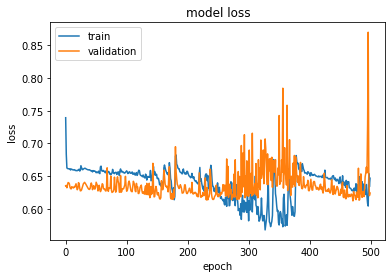

In [0]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper left')
plt.show()


AUC: 0.696


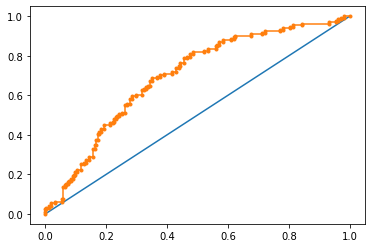

[[253   0]
 [131   0]]
Accuracy: 0.6588541666666666
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
y_pred2=model.predict(X_tst2)
y_pred2=(y_pred2>.5).astype(int)

# todo: use boot-strap estimation
probs = model.predict_proba(X_tst2)
probs = probs[:,0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

cmat = metrics.confusion_matrix(y_test, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred2, pos_label=1))

AUC: 0.500


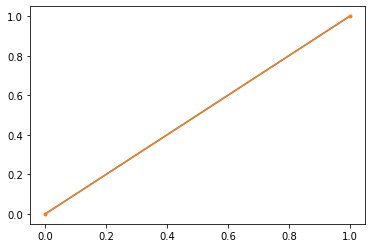

[[253   0]
 [131   0]]
Accuracy: 0.6588541666666666
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
model.load_weights('best.h5')

y_pred2=model.predict(X_tst)
y_pred2=(y_pred2>.5).astype(int)

# todo: use boot-strap estimation
probs = model.predict_proba(X_tst)
probs = probs[:,0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()


cmat = metrics.confusion_matrix(y_test, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred2, pos_label=1))

## Train LSTM with robustly normalized input data ##

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 7, 32)             4352      
_________________________________________________________________
lstm_38 (LSTM)               (None, 7, 64)             24832     
_________________________________________________________________
lstm_39 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_61 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_62 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 16)              

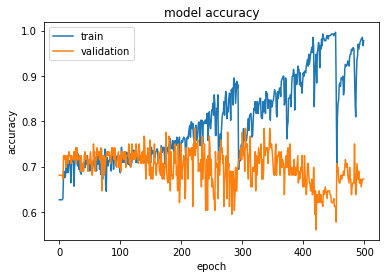

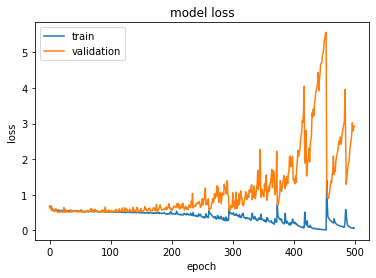

AUC: 0.710


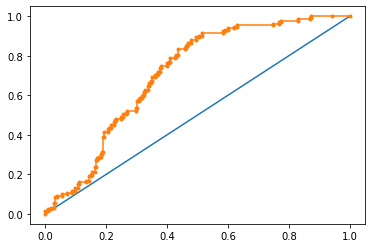

[[189  64]
 [ 67  64]]
Accuracy: 0.6588541666666666
Precision: 0.5
Recall: 0.48854961832061067


In [0]:
model = Sequential()
model.add(LSTM(32, input_shape = (7,1), return_sequences = True, kernel_initializer = 'uniform', activation ='relu'))
model.add(LSTM(64, kernel_initializer = 'uniform', return_sequences = True, activation = 'relu'))
model.add(LSTM(128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

from keras import optimizers 
        
lr=0.002 
b1=0.9; b2=0.999; ep=1e-08; dd=0.004
opt = optimizers.Nadam() #lr=lr, beta_1=b1, beta_2=b2, epsilon=ep, schedule_decay=dd)      
model.compile(loss = 'binary_crossentropy', optimizer = opt,  metrics = ['accuracy'])
model.summary()
history = model.fit(X_trn3, y_train, validation_split = 0.3, epochs = 500, batch_size = 64, verbose = 1,callbacks=C)

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc = 'upper left')
plt.show()

y_pred2=model.predict(X_tst3)
y_pred2=(y_pred2>.5).astype(int)

# todo: use boot-strap estimation
probs = model.predict_proba(X_tst3)
probs = probs[:,0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()


cmat = metrics.confusion_matrix(y_test, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred2, pos_label=1))


AUC: 0.805


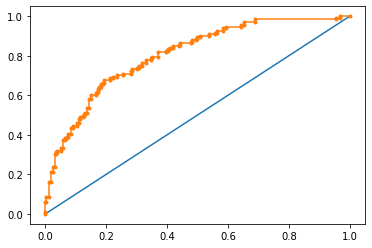

[[214  39]
 [ 52  79]]
Accuracy: 0.7630208333333334
Precision: 0.6694915254237288
Recall: 0.6030534351145038


In [0]:
model.load_weights('best.h5')

y_pred2=model.predict(X_tst3)
y_pred2=(y_pred2>.5).astype(int)

# todo: use boot-strap estimation
probs = model.predict_proba(X_tst3)
probs = probs[:,0]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle = '-')
pyplot.plot(fpr, tpr, marker = '.')
pyplot.show()

cmat = metrics.confusion_matrix(y_test, y_pred2)
print( cmat )
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, pos_label=1)) 
print("Recall:",metrics.recall_score(y_test, y_pred2, pos_label=1))


## Summarize results ##

### Using raw input data ###

| Method | Accuracy   |      Precision      |  Recall |
|-----|----------|:-------------:|------:|
| Logistic regression | 78.9  | 75.0  | 57.3  |
| LSTM (trial 1: best) | 76.3 | 67.0      |   60.3 |
| LSTM (trial 2: final) | 72.4 | 57.1      |  77.1 |
| LSTM (trial 4: best) | 65.9 | 50.0      |  93.2 |
| LSTM (trial 3: final) | 75.3 | 62.9      |  67.2 |

### Using robustly normalized input data ###

| Method | Accuracy   |      Precision      |  Recall |
|-----|----------|:-------------:|------:|
| Logistic regression | 79.2  | 75.8  | 57.3  |
| LSTM (best) | 76.3 | 67.0      |   60.3 |